## Programming for Data Analysis - Project

### Problem statement

For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. 

Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.


We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

* Investigate the types of variables involved, their likely distributions, and their relationships with each other.

* Synthesise/simulate a data set as closely matching their properties as possible.

* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

#### Note:
this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.

### Example project idea

As a lecturer I might pick the real-world phenomenon of the performance of students
studying a ten-credit module. After some research, I decide that the most interesting
variable related to this is the mark a student receives in the module - this is going to be
one of my variables (grade).

Upon investigation of the problem, I find that the number of hours on average a
student studies per week (hours), the number of times they log onto Moodle in the
first three weeks of term (logins), and their previous level of degree qualification (qual)
are closely related to grade. 

The hours and grade variables will be non-negative real number with two decimal places, logins will be a non-zero integer and qual will be a categorical variable with four possible values: none, bachelors, masters, or phd.

After some online research, I find that full-time post-graduate students study on average four hours per week with a standard deviation of a quarter of an hour and that a normal distribution is an acceptable model of such a variable. Likewise, I investigate the other four variables, and I also look at the relationships between the variables. 

I devise an algorithm (or method) to generate such a data set, simulating values of the
four variables for two-hundred students. I detail all this work in my notebook, and then
I add some code in to generate a data set with those properties.

-------------

## Contents

### 1. Overview

#### 1.2. The Variables

### 2. Basis for Variables

#### 2.1. Variable 1: Country

##### Comparison of Trends in Smoking Consumption
##### Indonesia
##### India

#### 2.2. Variable 2: Years

#### 2.3. Variable 3: Smokers (% of adults)

#### 2.4. Variable 4: Rating of Government Anti-Smoking Campaigns
##### Smoking Deaths and the Relationship with Investment in Anti-smoking Campaigs


#### 2.5. Variable 5: Influence of Tobacco Lobbying

##### Concern Over the Tactics of Tobacco Industry in Low-income Countries

### 3. Distributions of Variables

#### 3.1. Ordered Lists: Variable 1 and Variable 2

#### 3.2. The Poisson Distribution: Prevalence and Consumption Variable

#### 3.3. Summarising Poisson Values

#### 3.4. Graphing Data Produced by numpy.random.poisson

##### 3.4.1. Prevelance Variable: 3 Distplots and 1 Scatterplot

##### 3.4.2. Graphing Consumption Variable: 1 Distplot and 3 Scatterplots

### 4. Synthesising the Data

#### 4.1. 'Countries' Variables

#### 4.2. 'Years' Variable

#### 4.3. 'Prevelance' Variable

#### 4.4. 'Consumption' Variable

#### 4.5. Government Control Rating (0.0 - 5.0)

#### 4.5. 'Control Rating' Variable (0.0 - 5.0)

#### 4.6. 'Influence' Variable


---------------------

In [190]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import seaborn as sns
# Set seed of the generator
rng = np.random.default_rng(0)

-------------------------------

## Overview

This project seeks to demonstrate the core skills required to simulate random data, using the relevant statistical distributions and form this data into a dataset. 

I have chosen to centre the simulation on tobacco use across time. Specifically from the years 1950-2019. This decision was made as the is a common misconception that tobacco use, tobacco deaths and tobacco profits are in decline. This view is a result of the government lead restrictions brought introduced in many high-income countries throughout the 2000's and the 2010's. 

Indeed, in 2003, the World Health Organisation introduced the Framework Convention on Tobacco Control (FCTC) which sought to convince governments across the world to increase restrictions on the tobacco industry. This indeed has been successful in many nations.

However, in countries where there is a strong dependency on the tobacco industry for jobs and exports, there is evidence of tobacco companies using political clout to hold the introductions of restrictions in their tracks. In fact, the tobacco industry is as profitable now as it was during the 20th Century. With a growing population and influence in low-income countries, the tobacco industry is projected to reach a value of $1,124 Billion by 2024 (Cision, 2019).

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyLX7mH326mFsBEs3SLP3ohUZ8ikNOoMT8qw&usqp=CAU" style="width: 650px;"/>

With this in mind, 6 variables have been chosen as being relevant to simulating data for tobacco consumption and prevalence in 3 countries in the 70 year period 1950-2019. The variables and their functions have been listed below in section 1.2.

Three countries have been chosen for the simulation: India, Indonesia and Austria.

Section 2 below investigates the basis and real-world situation behind the chosen variables.

Section 3 details the distribution chosen for this study, the Poisson Distribution - scatterplots and Kernal Density plots of the variables have also been presented.

Finally, in Section 4, each variable is simulated and put together into a dataset that is presented in a cell at the bottom of the notebook.

-------------------------------

### 1.2. The Variables

1. **Country:** Categrical variable 

> I will chose 5 Developed countries where campaigns have been introduced to combat deaths from smoking. I will also      choose 5 developing nations where little or no effort has been made to combat smoking.


2. **Years:** Categorical variable

> I will be choosing a 30 year period, from 1980 to 2000, with one observation for each country per year. 


3. **Prevalence:** Numerical variable - Integer - Poisson Distribution 

> This datapoint should represent the percentage of adults that smoke. It will closely resemble the distribution of real data on this subject I discovered on *Our World in Data's* smoking series. It will be created using the Poisson Distribution.

4. **Consumption:** Numerical variable - Integer - Poisson Distribution

> This variable will represent the number of cigarettes consumed per capita in each country. It will be an integer that is created in the Poisson distribution.


5. **Control Rating:** Numerical variable

> This figure should be a rating that reflects standardised rating variables commonly utilised to represent subjects that contain many variable elements. This hypothetical variable, will be a floating point number between 1 and 5. It will be a variable that is difficult to gather in the real world. It will be said to be a rating of the various efforts of government in restricting tobacco sale.

6. **Influence of Tobacco Lobbying:** Categorical variable
 
> This variable should represent the influence that Big Tobacco and lobbying groups have in the countries and an overall reflection of their efforts to curtail government imposed tobacco control. The variable will contain 4 different categories stored as the following strings: "Weak", "Moderate", "Significant", "Strong". It will be dependent on the values of the 'Control Rating' variable. 

'Influence' variable values:
* A 'Control Rating of **>=   0 &  <   1**  = "Strong"
* A 'Control Rating of **>=   1 &  < 2.5**  = "Significant"
* A 'Control Rating of **>= 2.5 &  < 4.0**  = "Moderate"
* A 'Control Rating of **>= 4.0 &  < 5.0**  = "Weak"

--------------------------------

## 2. Basis for Variables

### Variable 1: Country

#### Comparison of Trends in Smoking Consumption

The countries included in this simulation will fall into two categories: Low-income and high-income nations. 

For the low-income category, India and Indonesia have been chosen for the simulation. 

For the high-income category, Austria alone has been chosen. All the countries included have been chosen as they exhibit varying degrees of smoking consumption, tobacco control and lobbying from the tobacco industry. 

It will be shown that Indonesia exhibits a high influence of tobacco companies and a low government control rating. As a result, the country has shown a rise in prevalence and cunsumption of tobacco products. Austria on the other hand shows a trend that is the polar opposite. India exhibits a trend that shows both a high level of government control in recent years and a contradictory slight rise in prevalence. 

#### Indonesia

The two graphs below display the percentage of smokers in South East Asia and the Indian sub-continent aged 15 and over who smoked in 1. 2007 and 2. 2018 (World Health Organization, Global Health Observatory Data Repository)

Firstly, we will look at Indonesia, a low-income countries where tobacco lobby influence is said to be strong and where there has prevailed a high level of tobacco consumption for the past 30 years, for a myriad of reasons. Recent studies on smoking in Indonesia point to factors such as a high degree of reliance on the tobacco crop, in conjunction with strong influence from Big Tobacco impeding restrictions as a means to explain the resiliance of the smoking industry. The alarming nature of the situation was clear back in 1999 when Catherine Reynolds noted specific details of the exponential increase in smoking: 

> * Male participation estimates range from 50% to 85%
> * Since 1970–72, per adult consumption of cigarettes (all forms) has more than doubled, from 500 to 1180 per adult
> * By 1985, a Jakarta study reported that 49% of boys and 9% of girls aged 10–14 were daily smokers
> * By 1995, a health department survey estimated that 22.9% of urban 10 year olds, and 24.8% of rural 10 year olds smoke.
 
This appears to have been viewed with enthusiasm among some Indonesian members of government, as Reynold's notes that an government report issued in 1991 stated: “Prospects for further market growth are considered good. Consumption levels per head of population are low by international standards. . . . A high proportion of Indonesia’s population is in the younger age groups, meaning that the potential population of smokers will be growing rapidly in the next decade at least.” 

This bears out in the data presented by Our World in Data on smoking prevalence as a percentage of adults over 15 years of age, that shows a rise for Indonesia from 32.9% in 2000 to 39.4% in 2016 (Global Health Observatory Data Repository, 2016).

**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2007: % Share of Adult Smoker (15 Years +)** 
<img src="Smoking_se_asia_2007.PNG
" alt="Drawing" style="width: 650px;"/>

**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2018: % Share of Adult Smoker (15 Years +)**
<img src="Smoking_se_asia_2018.PNG
" alt="Drawing" style="width: 650px;"/>

Keeping this in mind, Indonesia will be utilised as an example of a country where Big Tobacco influence is strong and smoking controls are weak. Myanmar displays a similar trend due to the same issues as Indonesia. As a result, the distributions of random data that will be created for these countries will be from the exponential distribution.

#### India

In contrast, India is a country that has successfully introduced smoking controls in recent years. In 2003, India overcame challenges in the courts to prevent the introduction of smoke-free public places, restrictions on tobacco advertising and promotion, amongst other measures. Following this, the country joined the WHO Framework Convention on Tobacco Control. Throughout the 2010's, the government incrementally brought in measures such as warning labels on tobacco products, higher tax on products and an increased power for police to sanction those who break advertising laws (WHO, 2015).

Despite this, the percentage of deaths attributed to smoking, as a share of overall deaths in the country, rose from 7.76% in 1990 to 9.03% in 2017 (Global Burden of Disease Collaborative Network, 2017). This underpins the reality that control measures have a limit to their potential and are limited in terms of how long it takes for measures to begin to show results. Chhabra et al.(2019) outline that smoking among middle aged adults remains high and among the less educated people and those lvining in rural areas. However, it is noted that the number of young and educated adult smokers has dropped significantly (Chabbra et al., 2019). This can account for the graph of current tobacco use above, whereby, India drops from having 38.5% of the population in 2007 to 27% in 2018. 

With this understanding of the demographics, we can assume that the distribution of datapoints for India should differ from that of Indonesia. As this project will attempt to recreate realistic distributions using random data, in terms of deaths it is evident that India still suffers from a high death. Therefore, the datapoints of the Death Rates variable should be created in the Uniform Distribution, with some permutations added. For the variables of government controls and tobacco companies profits, however, the random data produced should be separated into two categories: pre 2003 and post 2003. The introduction of the FCTC catalysed the introduction of control measures. The data before should resemble that of Indonesia and Myanmar. But following 2003, it should represent an comparative improvement.

#### Austria

Looking at the period 2012-2016, we can get a clear view of the stead trend in reduced smoking prevalence. The figures below are for men and women aged 15 years and over(MacroTrends:

* Austria smoking rate for 2016 was 29.60%, a 1% decline from 2015.
* Austria smoking rate for 2015 was 30.60%, a 0.8% decline from 2014.
* Austria smoking rate for 2014 was 31.40%, a 1% decline from 2013.
* Austria smoking rate for 2013 was 32.40%, a 1.2% decline from 2012.

Looking at a broader picture, the trend has been continuing for the past twenty years. In 2001, 43% of Asutrian adults (15+) smoked. The female prevalence rate was down to 28% percent in 2016 (Trading Economics). Since 2016, this trend has continued. It has continued as government restrictions on smoking in public places has continued and as taxes have risen. 

In 2018, smoking in Bars, Cafe's and nightclubs was banned (Vox), and whilst this is later than many other European states, Austria still exhibits a trend in reduced smoking that is high in comparison to the average. Most of the regulations proosed by the WHO's Framework Convention on Tobacco Control were introduced in Austria throughout the 2000's, this seemingly has had an effect on the prevalance and consumption of tobacco. 

With this in mind, Austria is a good country to study the effect of tobacco control. The comparison of Austria with Indonesia, will be useful for the simulation of data in this project.

-------------------

### 2.2. Variable 2: Years

The chosen range of years to be present in the dataset is from 1950-2020. This seventy year period has been chosen as it provides an adequate window of time both before and after the introduction of the FCTC in 2003 by the WHO.

The 1950's and 1960's was a time when the tobacco industry was coming under scrutiny for the first time as a health risk. As a result, efforts were made to imrpove marketing, in order to appeal to younger people and to provide a defence against the growing concern of the link between smoking and cancer. 

When the FCTC began advising governments in 2003 of the effect that restriction, such as taxes, banning of smoking in public places and plain packaging laws, there was a shift in much of the high-income world in terms of attitudes to smoking. Although this framework was instrumental in the measure brought in across Europe and in India, in many countries, such as Indonesia, the pressure from the tobacco industry was too strong, as was the economic tie, that many of these restrictions have yet to be brought in. 

----------------------

### Variable 3: Smokers (% of adults)

#### Justification for Variable

There were many variables that were considered as a key to highlighting the relationship between an increase in smoking and tobacco lobbying against government controls. For example, the number of deaths from smoking is a very important indictor of the consequences of smoking.

However, studying the number of annual deaths is complicated by the fact that deaths due to smoking can remain high even where efforts to restrict tobacco sale have been employed. 

In terms of highlighting the relationship with degrees of lobbying/restrictions, the percent of smoking is most appropriate for this simulation. Additionally, smoking prevalence is the primary indicator to tobacco companies themselves. Throughout the past, the marketing of tobacco towards young people was adopted as a means of increasing the share of smokers in the population, thereby creating more profits for the industy. 

#### Low-Income Countries

The graph below details smoking as a percentage of adults (over 15) from 2000 to 2016, in relation to India, Indonesia and Austria.

**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;%Share of Adult Smokers
(15 Years +)** 


<img src="smoking_2016_3_countries.PNG"/>

*Image from Our World in Data*

##### India

As was noted in the discussion of India, the number of deaths from smoking increased in the same period of time that the percentage of population smoking decreased. This was due to the fact that whilst middle-aged people smoked more and were not particularly influenced by government measures, younger people had increasingly chose not to smoke. As can be seen in the graph above, India actually experienced a drop in almost 10% from 2000 to 2016. This is a significant achievement for a low-income country. In creating random data for smoking prevelance in India, the Gamma distribution will be used to simulate this steep decline.

##### Indonesia

Contrastly, in Indoenesia with little government intervention and a strong degree of influence from the tobacco industry, the country experienced the only increase in smoking prevelance out of the 6 example countries. In 2000, 33% of Indonesians smoked, but by 2016 this figure was at 40%. The comparison between India and Indonesia best exemplifies the relationship between government intervention and decreasing smoking prevelance. 

##### Austria

As was discussed in section 2.1, Austria saw a massive decrease in Prevalence in the 2000 to 2016 range. This drop of almost 20% is significant necessitates the creation of random data that reflects a sharp and consistent downwards trend.

-----------------

### Variable 4: Consumption (cigarettes per capita per year)

The graph below details daily consumption rates in India, Indonesia and Austria, from 1980 to 2012. This relates to the number of cigarettes smoked everyday by smokers. Interestingy, this graph contradicts the trends shown previously, that showed Austria as having a lower prevalence rate than India or Indonesia. Indeed, when it comes to daily consumption, European states have a high rate of smokers that smoke excessively. Andorra, Belgium and Luxembourg score higher than many low-income nations. This may have cultural or economic reasons that factor in. 

<img src="smoking_daily_consumption.PNG"/>

For the purposes of this simulated study, however, which intends to simulate data indicating that Smoking Controls have a trend decreasing effect, the 'Consumption' variable data created will point to Indonesia as having a higher consumption rate.

It is important to note that the variable in the dataset below relates to yearly per capita cigarette numbers, per smoker. This variable, when used with the Prevalence variable, will function as a means of determining the 'Control Rating' variable.

-----------------

### Variable 5: Control Rating (measure of government tobacco control)

#### Function of Variable

This variable will be a numeric float, between 0 and 5, where a higher number indicates a large degree of government control of tobacco and a low rating indicates little control.

As this is a simulation, there is no need to collect the necessary data to produce this datapoint. If this were a real-world study, the variable would require a qualitative study of smoking restrictions for the public, smoking bans on advertising, the level of taxes on tobacco sale and finally, whether or not the relevant government had engaged in anti-smoking PR campaigns.

#### Smoking Deaths and the Relationship with Investment in Anti-smoking Campaigs

In the past two decades there has been a considerable effort by many developed nations to decrease smoking. This effort has taken many forms. Many countries have hiked taxes that consumers pay on cigarette purchases, in order to both deter people from smoking and to cover the cost of the healtcare that long-term smokers require. Additionally, restrictions have been put on the sale of cigarettes, such as getting rid of branding that tobacco companies are allowed to use. This follows on from laws introduced in the 1990's and 2000's making it illegal to advertise cigarettes to consumers. Finally, campaigns have been launched across Europe, America and in many developing nations (though not all) to highlight the high correlation between smoking and various forms of cancer. 

The result is a considerable decrease in smoking related deaths for 100,000 of the populations of these countries where restrictions and campaigns were launched. This success should not be diminished - it highlights that a conscious effort can significantly affect the mindset of peoples and also forms part of a greater awareness worldwide of being more aware of what we put into our bodies.

Despite this success however, there is evidence that in some developing nations, where smoking is more prevelant to begin with and where litte has been done in the way of restricting the operations of tobacco combanies in the marketing and sale of product, that smoking related deaths have not decreased, but rather increased. 

Looking at the sales of the top 5 tobacco companies, or 'Big Tobacco' as they are collectively known as, in some countries these companies have seen an increase in revenues in recent years. Some articles have even highlighted how this is arguably the most profitable time in history for tobacco companies (The Guardian, 2017).

--------------------

### Variable 6: Influence ( of tobacco industry)

#### Function of Variable

This will be a categorical variable, populated by one of four strings: 'Weak', 'Moderate, 'Significant', 'Strong'. The value row each row of 'Influence' data in the simulated dataset below, will be dependent on the value of the 'Control Rating' variable (i.e. code for the Influence variable will extract the value from the Control Rating column, through conditions entered into pandas such as:

> **dataset1.loc[(dataset1["Control Rating"] >= 0) & (dataset1["Control Rating"] < 1), "Influence"] = "Strong"**

Similar to the Control Rating variable, the real world way of determining which category of 'Influence' each row of data would contain, would involve a qualitative study of the tactics of tobacco lobbying in the relevant country, the marketing strategy and the relationship of 'Big Tobacco with government.

#### Concern Over the Tactics of Tobacco Industry in Low-income Countries

In July 2019, a major group responsible for highlighting the consequences of smoking, Ash (or Action on Smoking and Health), opened their report on smoking in developing countries with the following statement:

> "Around 1.1 billion people aged 15 and over smoke, with 80% living in LMICs (low and middle income
countries). Tobacco growing and consumption have become concentrated in the developing world where
the health, economic, and environmental burden is heaviest and likely to increase."

Ash's assertment is backed up by data of a surge in Tobacco company profits, studies carried out throghout Africa and Southeast Asia of tactics from 'Big Tobacco' to curtail government efforts to tackle smoking and numerous verified reports of illegal marketing ploys in low-income countries.

Since 1984, British American Tobacco (BAT), in association with the International Tobacco Growers’ Association (ITGA), an organisation that was founded to lobby for Big Tobacco, have used varius tactics to pressure low-income countries to abandom restrictions on the growing and sale of Tobacco. Taking Malawi as an example, a country that has a long history of tobacco crop farming. In 1986, a government official pushed back against the World Health Organisation on the issue of tobacco control, on the basis that it would negatively impact the economy of Malawi. Indeed, today tobacco sale accounts for 70% of Malawi's foreign earnings (Mamudu et al., 2009). This economic dependency and the tact of the tobacco lobbies, lead the  International Tobacco Growers’ Association (ITGA) to platform tobacco growers representatives against the bodies of the United Nations responsible for tobacco control. This tactic formed part of a larger strategy, drawing on representatives from the industry in low-income countries and eventually lead to the weakening of the focus on health in the UN's tobacco control narrative (Mamudu et al, 2009).

In 2017, in an expose on the marketing ploys of Philip Morris in India, Reuters reported that the company responsibe fr the Marlboro brand, breached India's anti-smoking laws. Amongst the many tactics used included the placement of colourful advertisements in kiosks across New Delhi and handing out free cigarettes to young people at parties (Reuters, 2017).

Indonesia is a country where tobacco growing and consumption are notably high and where tobacco companies focus on quelling restrictions. In 2017, it was reported that Indonesia consumed 322 million cigarettes. A survey in 2019 found that curiosity was the primary reason for Indonesians to start smoking, with the average age that a smoker had their first cigarette was 16-18 (Hirschmann, December 2020). 

Overall, there is consensus that tobacco lobbying in low-income countries has had a considerble effect on the introduction of even minor forms of tobacco control. A study in 2016 specifically examined the introduction of health warning labels on cigarette packaging. These labels were compliant with the WHO's Framework Convention on Tobacco Control (FCTC). They concluded that countries where state capacity were low were less likely to introduce the warning labels (Hiilam and Glantz, 2016). This remains as an ever present issue when it comes to tackling cigarette comsumption globally.

----------------------

## 3. Distributions of Variables

### 3.1. Ordered Lists: Variable 1 and Variable 2

#### 1. Countries

The Countries variable of the dataset is not randomised. It is an ordered list with 70 datapoints for each of the three countries: India, Indonesia and Austria.

#### 2. Years

Similar to the Countries variable, the Years variable is an ordered list of 70 years for each country. Each country contains 70 rows of data for the years ranging from 1950-2019.

------------------------

### 3.2. The Poisson Distribution: Prevalence and Consumption Variable

<img src="https://www.researchgate.net/publication/329379093/figure/fig4/AS:699921351049216@1543885662248/Degree-distribution-All-the-networks-show-a-Poisson-distribution-as-corresponds-to.ppm"/>


#### Summary of the Distribution

In statistics, a Poisson distribution is a statistical distribution that shows how many times an event is likely to occur within a specified period of time. It is used for independent events which occur at a constant rate within a given interval of time (Investopedia, 2019).

In business, the Poisson distribution is widely used to analyse operational efficiency in order to understand what steps can be taken for improved business solutions. 

Example uses of the Poisson ditribution are in Customer Service staffing, where calculating the maximum number of phone calls that need to be dealt with every hour is a key to meeting customer demand. The distribution is also used in retail to determine whether it is financially viable to keep a store open 24 hours a day (CFI, 2019.

Below is the Poisson Distribution formula, where the mean (average) number of events within a specified time frame is designated by Lamda, as seen below:

<img src ="https://www.onlinemathlearning.com/image-files/poisson-distribution-formula.png"/>

Below is a graph of four Probability Density Functions featuring the Poisson Distribution, with various values for Lamda:

<img src="https://www.itl.nist.gov/div898/handbook/eda/section3/gif/poipdf4.gif" alt="Drawing" style="width: 650px;"/>

#### Appropriateness of the Poisson Distribution

As this distribtion is used for independent events which occur at a constant rate within a given interval of time, it is an appropriate choice for Variable 3 ('Prevalence', % of poplation that smoke) and Variable 4 ('Consumption', no. of cigarettes consumerd per capita per year).

As each row of data in the Smoking Dataset relates to an annual obervation in the range of 1950 to 2019, the events occur at a constant rate. Furthermore, as detailed in Section 2, 'Prevelance' and 'Consumption' as represented in the available data, show enough deviations from other variables to classify them as independent event. 

Despite this, there are some considerations about where the Poisson Distribution scenarious arent ideal.

The following are the conditions under which the Poisson Distribution is appropriate (CFI):

* k is the number of times an event happens within a specified time period, and the possible values for k are simple numbers such as 0, 1, 2, 3, 4, 5, etc.


* No occurrence of the event being analyzed affects the probability of the event re-occurring (events occur independently).


* The event in question cannot occur twice at exactly the same time. There must be some interval of time – even if just half a second – that separates occurrences of the event.


* The probability of an event happening within a portion of the total time frame being examined is proportional to the length of that smaller portion of the time frame.

* The number of trials (chances for the event to occur) is sufficiently greater than the number of times the event does actually occur (in other words, the Poisson Distribution is only designed to be applied to events that occur relatively rarely).

Looking at the last two points here, the very last condition relating the number trials being greater than the actualy events, the randomised data in this dataset does not meet this requirement. As we are applying the distribution to the very common act of smoking and the annual stats relating to it, then the events in question do not happen rarely.

With this limiting factor in mind, we will nonetheless use Poisson to simulate 'Prevalence' and 'Consumtion'.

### Summarising Poisson Values

Below is a table detailing the Poisson distribution values entered into the numpy.random() functions for each country and year range.

|   Country / Year Range | Variable |Lamda Value|SizeValue|
| :--- | :--- | :--- | :--- |
| India: 1950-1999 | Prevalence | 16 | 50 |
| India: 2000-2019   | Prevalence    | 20    | 20    |
| Indonesia:1950-1999   |Prevelance |  32   | 50   | 
|  Indonesia: 2000-2019 | Prevelance   | 45    | 20   |
| Austria: 1950-1999  |Prevalence  |30  |50  |
|Austria:2000-2019  |Prevalence   |12  | 20 |
| India: 1950-1999|  Consumption  | 1500   |50    |
| India: 2000-2019 | Consumption | 1400 |20  |
| Indonesia:1950-1999  | Consumption  |1200  |50  |
|  Indonesia: 1950-1999  | Consumption   | 2400   | 20   |
| Austria: 1950-1999  |   Consumption  | 2300  | 50 |
| Austria:2000-2019  |   Consumption  | 1300  | 20  |



The data for 'Prevalence' and 'Consumption' variables, each have two different Poisson distributions based on year. As there was some effect from the introduction of government restriction on cigarettes since the 2003 FCTC, the distribution function has been applied across two distinct ranges of years: 1950-1999 and 2000-2019.


##### Lamda Values to Reflect Trends of Each Country

* For India: I have created random values that reflect a slight increase in Prevelance in the 2000-2019 data. I have detailed a decrease in the Indian consumption rate.
* For Indonesia, I have detailed a large increase in Prevelance from 2000-2019 and a large increase in Consumption for the same period.
* For Austria, I have detailed a drop from 30% to 12% prevalence in the 2000-2019 period. A significant drop in Consumption for the same period too.

Note however, that as there are more datapoints for the 1950-1999 range than for the 2000-2019 range, that the graphs depicted below is skewed for towards representing the 1950-1999 data.

### 3.4. Graphing Data Produced by numpy.random.poisson

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import seaborn as sns
# Set seed of the generator
rng = np.random.default_rng(0)

In [176]:
j = pd.read_csv('smoking.csv')

In [177]:
c = pd.read_csv('smoking_graphs.csv')

In [178]:
india_graph = j.iloc[0:69, :]
indonesia_graph = j.iloc[70:139, :]
austria_graph = j.iloc[140:209, :]

###  Prevelance Variable: 3 Distplots and 1 Scatterplot

#### India: KDE of Prevalence Variable

The plot below features a peak of about 17% Prevalence for Indians.

[Text(0.5, 1.0, 'KDE of India Prevalence (% of smokers in pop.)')]

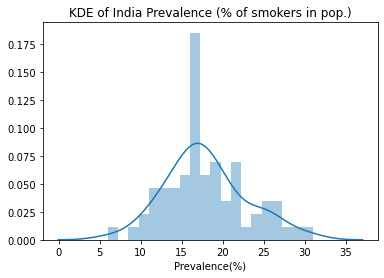

In [181]:
sns.distplot(india_graph["Prevalence(%)"], bins=20, 
             kde=True).set(title="KDE of India Prevalence (% of smokers in pop.)")

#### Indonesia: KDE of Prevelance

Indonesia displays a peak of about 32%.

[Text(0.5, 1.0, 'KDE of Indonesia Prevalence (% of smokers in pop.)')]

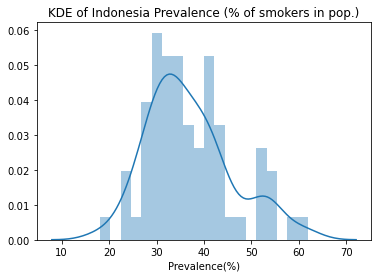

In [182]:
sns.distplot(indonesia_graph["Prevalence(%)"], bins=20, 
             kde=True).set(title="KDE of Indonesia Prevalence (% of smokers in pop.)")

#### Austria: KDE of Prevelance

Austria shows a peak of about 30% (possibly due to skewing of data between the ranges).

[Text(0.5, 1.0, 'KDE of Austria Prevalence (% of smokers in pop.)')]

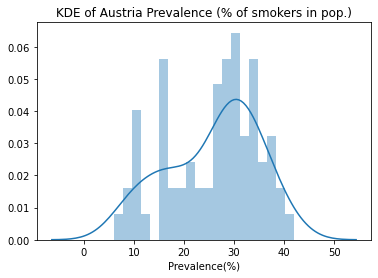

In [184]:
sns.distplot(austria_graph["Prevalence(%)"], bins=20, 
             kde=True).set(title="KDE of Austria Prevalence (% of smokers in pop.)")

#### Scatterplot of Prevalence Vs. Years (3 Countries)

In the plot below notice:
1. The increase in Prevalence values for Indonesia for the period 2000-2019 
2. The decrease in Prevalence in Austria for the same period
3. The more or stable level for India.

[Text(0.5, 1.0, '1950-2019: % of Smokers')]

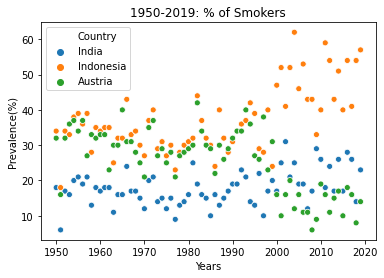

In [183]:
sns.scatterplot(x="Years", y="Prevalence(%)", data=j, hue="Country").set(title='1950-2019: % of Smokers')

### Graphing Consumption Variable: 1 Distplot and 3 Scatterplots

#### India: KDE of Consumption

India's KDE features a peak representing an average of 1500 cigarettes per capita per year.

[Text(0.5, 1.0, 'KDE of India Consumption(no.of cigs.per capita per year)')]

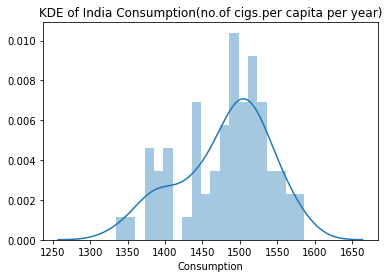

In [187]:
sns.distplot(india_graph["Consumption"],bins=20, 
             kde=True).set(title="KDE of India Consumption(no.of cigs.per capita per year)")

#### India: Scatterplot Consumption Vs. Years

Looking at the countries individually in terms of bivariate plits of Consumption Vs Years is more effective at outining the data.

In the plot below look a the decrease evident in the 2000-2020 range, as created by Numpy's random.poisson() function.

[Text(0.5, 1.0, 'India: Yearly Consumption Cigs(per person)')]

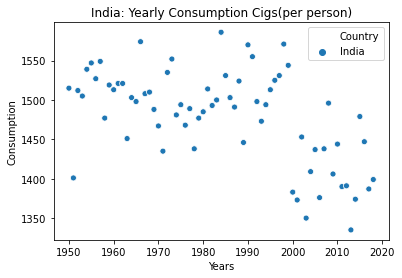

In [161]:
sns.scatterplot(x="Years", y="Consumption",data=india_graph,
                hue="Country").set(title='India: Yearly Consumption Cigs(per person)')

#### Indonesia: Scatterplot of Consumption Vs. Years

These plot expose the disparity in how the Poisson function generated its Consumption data for the 1950-1999 and 2000-2019 ranges.

The years 1950 to 2000 express an average of around 1200 in Consumption, whilst the second year range, expresses an average of about 2400. This reflects the reported surge in cigarette consumption in the past few decades.

[Text(0.5, 1.0, 'Indonesia: Yearly Consumption Cigs(per person)')]

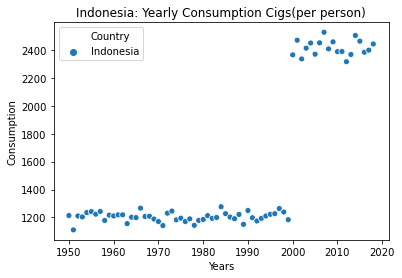

In [188]:
sns.scatterplot(x="Years", y="Consumption",data=indonesia_graph,
                hue="Country").set(title='Indonesia: Yearly Consumption Cigs(per person)')

#### Austria: Scatterplot of Consumption Vs. Years

Meanwhile, Austria's data reflects the polar opposite trend. An average for the 1950-1999 range of 2300, dropping to 1300 for 2000-2019. This reflects the effects that government control inspired by the FCTC has had.

[Text(0.5, 1.0, 'Austria: Yearly Consumption Cigs(per person)')]

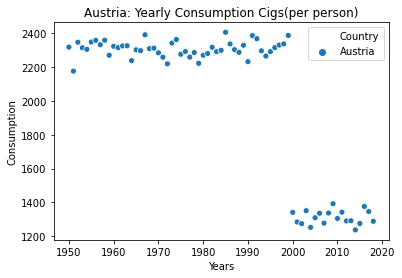

In [189]:
sns.scatterplot(x="Years", y="Consumption",data=austria_graph,
                hue="Country").set(title='Austria: Yearly Consumption Cigs(per person)')

In terms of 'Consumption', as detailed in Section 2, there were many examples from the years 1980-2018, where the trend for number of cigarettes consumed per capita contradicted the rate of government restrictions. This indicates that the variable is independent. 

For 'Prevalence', although the trend for government control and reduced tobacco company influence shows to affect the % of population that smoke, the variable still shows evidence of independence. As was noted in Section 2, in relation to India, despite government restriction on smoking, many 

#### CorporateFInanceInstitute, Poisson Dist: https://corporatefinanceinstitute.com/resources/knowledge/other/poisson-distribution/

#### poisson investopedia: https://www.investopedia.com/terms/p/poisson-distribution.asp#:~:text=In%20statistics%2C%20a%20Poisson%20distribution,a%20given%20interval%20of%20time.

#### pisson dist formula IMAGE: https://www.onlinemathlearning.com/image-files/poisson-distribution-formula.png

#### examples of poisson on graphs IMAGE: https://www.itl.nist.gov/div898/handbook/eda/section3/gif/poipdf4.gif

#### Utility of the Poisson Distribution in 

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import seaborn as sns
# Set seed of the generator
rng = np.random.default_rng(0)

## 4. Synthesising the Data

### 4.1. 'Countries' Variable

In [107]:

# Create a dataframe with 3 empty column
empty_1 = pd.DataFrame({'india' : [np.nan],
                              'indo': [np.nan],
                         'aust': [np.nan],
                       })


# Add 70 rows to the 3 empty columns
country_1 = empty_1.reindex(empty_1.index.tolist() + list(range(1, 70)))

# Replacing empty values with coutnry name 
country_1["india"].fillna("India", inplace = True) 
country_1["indo"].fillna("Indonesia", inplace = True) 
country_1["aust"].fillna("Austria", inplace = True)

# Use iloc for all rows to fit column beside each other
india = country_1.iloc[:,0:1]

indonesia = country_1.iloc[:,1:2]

austria = country_1.iloc[:,2:3]

# Set the country column heading and use the .column method to fit columns into 1
country_column = ["Country"]
india.columns = country_column
indonesia.columns = country_column
austria.columns = country_column

# Concatenate the dataframe and set ignore_index to true to ensure a continuous index from 0-209
Countries = pd.concat([india, indonesia, austria], ignore_index=True) 

### 4.2. 'Years' Variable

In [136]:
# Create a list of years from 1950-2019 for each country and group it as a dataframe called years 
 
Years = pd.DataFrame({"Years": [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 
                                1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
                                1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
                                1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
                                1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                                2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                                2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
                               
                                1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 
                                1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
                                1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
                                1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
                                1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                                2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                                2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
                                
                                1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 
                                1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
                                1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
                                1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
                                1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                                2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                                2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019 ] } )

### 4.3. Prevelance Variable

##### India

In [137]:
rng = np.random.default_rng(0)

# Generate random data for share of adults that smoke (15 years or older) 

# 1950 - 1999: % of poulation that smoked remained pretty steady
# Use np.poisson to create  to create
prevalence_india_1 = rng.poisson(16, 50)

# 2000 - 2019: Consumption increased
prevalence_india_2 = rng.poisson(20, 20)

# Round to 1 decimal
R_prevalence_india_1 = prevalence_india_1.round(1)
R_prevalence_india_2 = prevalence_india_2.round(1)

# Transform Arrays into DataFrames
DF_prevalence_india_1 = pd.DataFrame(R_prevalence_india_1)
DF_prevalence_india_2 = pd.DataFrame(R_prevalence_india_2)

##### Indonesia

In [138]:
rng = np.random.default_rng(0)

# Generate random data for share of adults that smoke (15 years or older) 

# 1950 - 1999: % of poulation that smoked remained pretty steady
# Use np.poisson to create  to create
prevalence_indo_1 = rng.poisson(32, 50)

# 2000 - 2019: % of population increased
prevalence_indo_2 = rng.poisson(45, 20)

# Transform Arrays into DataFrames
DF_prevalence_indo_1 = pd.DataFrame(prevalence_indo_1)
DF_prevalence_indo_2 = pd.DataFrame(prevalence_indo_2)

##### Austria

In [139]:
rng = np.random.default_rng(0)

# Generate random data for share of adults that smoke (15 years or older) 

# 1950 - 1999: % of poulation that smoked remained pretty steady
# Use np.poisson to create  to create
prevalence_aust_1 = rng.poisson(30, 50)

# 2000 - 2019: % of population decreased
prevalence_aust_2 = rng.poisson(12, 20)

# Transform Arrays into DataFrames
DF_prevalence_aust_1 = pd.DataFrame(prevalence_aust_1)
DF_prevalence_aust_2 = pd.DataFrame(prevalence_aust_2)

##### Concatenate to fix into 1 column

In [140]:
# Use pd.concat to fit the 6 objects for the Prevalence variable into a single column ignore_index set to True 
Prevalence = pd.concat([DF_prevalence_india_1, DF_prevalence_india_2, DF_prevalence_indo_1, DF_prevalence_indo_2,
               DF_prevalence_aust_1, DF_prevalence_aust_2], axis=0, join='inner', ignore_index=True)

# Add the title
Prevalence.columns = ["Prevalence(%)"]

### 4.4. 'Consumption' Variable

##### India

In [141]:
rng = np.random.default_rng(0)

# Generate random data for number of cigarettes consumed per person per year(15 years or older) 

# 1950 - 1999: Consumption of cigs per person per year remained pretty steady
# Use np.poisson to create  to create
percapita_india_1 = rng.poisson(1500, 50)

# 2000 - 2019: Consumption increased
percapita_india_2 = rng.poisson(1400, 20)

# Transform Arrays into DataFrames
DF_percapita_india_1 = pd.DataFrame(percapita_india_1)
DF_percapita_india_2 = pd.DataFrame(percapita_india_2)

##### Indonesia

In [142]:
rng = np.random.default_rng(0)

# Generate random data for number of cigarettes consumed per person per year(15 years or older) 

# 1950 - 1999: Consumption of cigs remained pretty steady
# Use np.poisson to create  to create
percapita_indo_1 = rng.poisson(1200, 50)

# 2000 - 2019: Consumption increased
percapita_indo_2 = rng.poisson(2400, 20)

# Transform Arrays into DataFrames
DF_percapita_indo_1 = pd.DataFrame(percapita_indo_1)
DF_percapita_indo_2 = pd.DataFrame(percapita_indo_2)

##### Austria

In [143]:
rng = np.random.default_rng(0)

# Generate random data for number of cigarettes consumed per year(15 years or older)

# 1950 - 1999: Consumption of cigs remained pretty steady
# Use np.poisson to create  to create
percapita_aust_1 = rng.poisson(2300, 50)

# 2000 - 2019: Consumption increased
percapita_aust_2 = rng.poisson(1300, 20)

# Transform Arrays into DataFrames
DF_percapita_aust_1 = pd.DataFrame(percapita_aust_1)
DF_percapita_aust_2 = pd.DataFrame(percapita_aust_2)

##### Concatenate to fix into 1 column

In [144]:
Consumption = pd.concat( [DF_percapita_india_1, DF_percapita_india_2, DF_percapita_indo_1, DF_percapita_indo_2,
               DF_percapita_aust_1, DF_percapita_aust_2], axis=0, join='inner', ignore_index=True)

Consumption.columns = ["Consumption"]                      

### 4.5. 'Control Rating' Variable (0.0 - 5.0)

##### India

In [145]:
rng = np.random.default_rng(0)

# Generate random data for Government Control in Uniform Distribution 

# 1950 - 2002: There was very little government control in India
rating_india_1 = rng.uniform(0.6, 1.4, 53)

# 2003 - 2019: FCTC adopted, rating increase
rating_india_2 = rng.uniform(1.5, 1.4, 17)

# Round to 1 decimal
R_rating_india_1 = rating_india_1.round(1)
R_rating_india_2 = rating_india_2.round(1)

# Transform Arrays into DataFrames
DF_rating_india_1 = pd.DataFrame(R_rating_india_1)
DF_rating_india_2 = pd.DataFrame(R_rating_india_2)

In [146]:
rng = np.random.default_rng(0)

# Generate random data for Government Control in Uniform Distribution 

# 1950 - 2002: There was very little government control in Indonesia
rating_indo_1 = rng.uniform(0.3, 1.2, 53)

# 2003 - 2019: There was little or no increase
rating_indo_2 = rng.uniform(1.3, 1.8, 17)

# Round to 1 decimal
R_rating_indo_1 = rating_indo_1.round(1)
R_rating_indo_2 = rating_indo_2.round(1)

# Transform Arrays into DataFrames
DF_rating_indo_1 = pd.DataFrame(R_rating_indo_1)
DF_rating_indo_2 = pd.DataFrame(R_rating_indo_2)

#### Austria

In [147]:
rng = np.random.default_rng(0)

# Generate random data for Government Control in Uniform Distribution 

# 1950 - 2002: There was limited control
rating_aust_1 = rng.uniform(1.3, 2.6, 53)

# 2003 - 2019: FCTC adopted, many controls brought in 
rating_aust_2 = rng.uniform(4.1, 4.9, 17)

# Round to 1 decimal
R_rating_aust_1 = rating_aust_1.round(1)
R_rating_aust_2 = rating_aust_2.round(1)

# Transform Arrays into DataFrames
DF_rating_aust_1 = pd.DataFrame(R_rating_aust_1)
DF_rating_aust_2 = pd.DataFrame(R_rating_aust_2)

##### Concatenate to fix into 1 column

In [148]:
Rating = pd.concat( [DF_rating_india_1, DF_rating_india_2, DF_rating_indo_1, DF_rating_indo_2,
               DF_rating_aust_1, DF_rating_aust_2], axis=0, join='inner', ignore_index=True)

Rating.columns = ["Control Rating"]

#### Concatenate the 5 Variables Together Using concat()

In [149]:
pd.set_option('display.max_rows', 300)

# Concatenate the dataframes along the x-axis, setting the join parameter to 'inner' and axis=1
dataset1 = pd.concat([Years, Countries, Prevalence, Consumption, Rating], axis=1, join='inner')

# Print the first 20 rows
dataset1.head(210)

,Years,Country,Prevalence(%),Consumption,Control Rating
0,1950,India,18,1515,1.1
1,1951,India,6,1401,0.8
2,1952,India,17,1512,0.6
3,1953,India,16,1505,0.6
4,1954,India,20,1539,1.3
5,1955,India,21,1547,1.3
6,1956,India,19,1527,1.1
7,1957,India,21,1549,1.2
8,1958,India,13,1477,1.0
9,1959,India,18,1519,1.3


### 4.6. 'Influence' Variable

In [150]:
# Use the loc() on dataset1 to access the control rating read the value and interpret the value of Control Rating

dataset1.loc[(dataset1["Control Rating"] >= 0) & (dataset1["Control Rating"] < 1), "Influence"] = "Strong"
dataset1.loc[(dataset1["Control Rating"] >= 1) & (dataset1["Control Rating"] < 2.5), "Influence"] = "Significant"
dataset1.loc[(dataset1["Control Rating"] >= 2.5) & (dataset1["Control Rating"] < 4.0), "Influence"] = "Moderate"
dataset1.loc[(dataset1["Control Rating"] >= 4.0) & (dataset1["Control Rating"] < 5.0), "Influence"] = "Weak"

# Print the top 10 rows for both columns
dataset1[['Control Rating', 'Influence']].head(10)

,Control Rating,Influence
0,1.1,Significant
1,0.8,Strong
2,0.6,Strong
3,0.6,Strong
4,1.3,Significant
5,1.3,Significant
6,1.1,Significant
7,1.2,Significant
8,1.0,Significant
9,1.3,Significant


In [151]:
dataset1.to_csv(r'smoking.csv')

In [98]:
dataset_for_graphs = pd.concat([Years, Prevalence, Consumption, Rating], axis=1, join='inner')

dataset_for_graphs.to_csv(r'smoking_graphs.csv')